In [1]:
import os, pandas as pd, numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

C:\Users\evari\AppData\Local\Temp\ipykernel_7628\3446098346.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#Initial read
df = pd.read_csv('ml_project1_data.csv')

## EDA

In [3]:
#default description technique
description = df.describe()

#count of nulls
null_count = df.isnull().sum()
null_count.name = 'null_count'

description = pd.concat([description,pd.DataFrame(null_count).T])

#outliers
mean = description.loc['mean']
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3 - Q1

# outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers count
outliers_mask = ((df < lower_bound) | (df > upper_bound))
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

outliers.name = 'outliers'

description = pd.concat([description, pd.DataFrame(outliers).T])

display(description)


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,NaN,NaN,NaN
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,NaN,NaN,NaN
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,NaN,NaN,NaN
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,NaN,NaN,NaN
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,NaN,NaN,NaN
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,NaN,NaN,NaN
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,NaN,NaN,NaN
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,NaN,NaN,NaN
null_count,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
outliers,0.000000,3.000000,8.000000,0.000000,0.000000,0.000000,35.000000,227.000000,175.000000,223.000000,248.000000,207.000000,86.000000,4.000000,23.000000,0.000000,8.000000,163.000000,167.000000,163.000000,144.000000,30.000000,21.000000,0.0,0.0,334.000000,0.0,0.0,0.0


#### check of outliers to confirm if they are being captured right

In [4]:
#This check is done to every column and data will be treated in the next step
print('Common Statistics for {col}')
col = 'Year_Birth'
display(description[col])
print(f'{col}\nQ1 = {Q1[col]}, Q3 = {Q3[col]}, IQR = {IQR[col]}, lowerbound = {Q1[col] - 1.5 * IQR[col]}, upperbound = {Q3[col] + 1.5 * IQR[col]}, outliers_count = {len(df[(df[col]>Q3[col] + 1.5 * IQR[col])|(df[col]<Q1[col] - 1.5 * IQR[col])])}')

Common Statistics for {col}


count         2240.000000
mean          1968.805804
std             11.984069
min           1893.000000
25%           1959.000000
50%           1970.000000
75%           1977.000000
max           1996.000000
null_count       0.000000
outliers         3.000000
Name: Year_Birth, dtype: float64

Year_Birth
Q1 = 1959.0, Q3 = 1977.0, IQR = 18.0, lowerbound = 1932.0, upperbound = 2004.0, outliers_count = 3


In [5]:
#This cell outlines every outlier. In the printed example, it shows clients of Year Birth <=1900, that should be removed.
df[(df[col]>Q3[col] + 1.5 * IQR[col])|(df[col]<Q1[col] - 1.5 * IQR[col])][['ID',col]]

,ID,Year_Birth
192,7829,1900
239,11004,1893
339,1150,1899


In [6]:
#we can detect some weird values. like Year_Birth = 1893, so we will remove rows that doesn't make sense. 
#removed single occurrence of Income = 666666
#removed NumWebPurchases > 23
#dropped columns Z_CostContact and Z_Revenue
#dropped ID as it's only a rownumber, with no meaningful value
#kept other columns as their outlier counts seemed natural and part of the sample, were not unique occurrences
#there are 24 nulls in Income, lets fill it with the median Income

df = df[df.Year_Birth>=1940]
df = df[df.Income!=666666]
df = df[df.NumWebPurchases<23]
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)
df.Income = df.Income.fillna(df.Income.median())

In [7]:
#compared to the original sample of 2240, 8 rows were removed after filtering.
len(df)

2232

#### Outliers of spend amont ("Mnt") measures

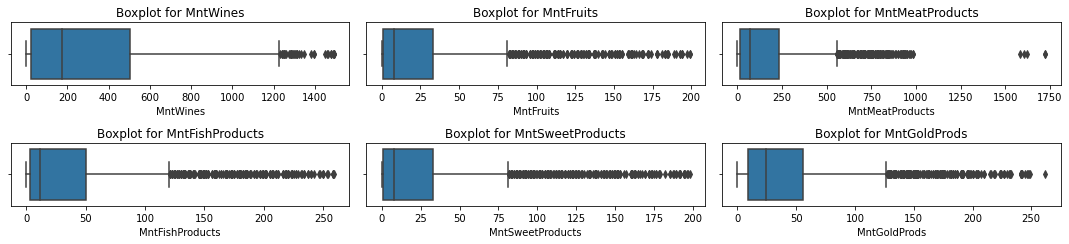

In [8]:
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,3.5))
ax = ax.flatten()

for i, col in enumerate(spend_columns):
    sns.boxplot(df[col],ax=ax[i])
    ax[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

#### Outliers conclusion

Outliers are common in retail, indicating high variability in spending. They not be removed as they actually highlight the presence of high-value customers. These customers are essential for premium product promotions and loyalty programs.

### Demographics

#### Age and age grouping columns creation for demographics

In [9]:
# Calculate the current year
current_year = 2024

# Calculate age from Year_Birth
df['Age'] = current_year - df['Year_Birth']

# Define bins and labels for age groups
age_bins = [0, 18, 26, 36, 46, 56, 71, 150]  # Including 150 to cover all ages above 70
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-70', '70+']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to verify the AgeGroup column
display(df[['Year_Birth', 'Age', 'AgeGroup']].head())

,Year_Birth,Age,AgeGroup
0,1957,67,56-70
1,1954,70,56-70
2,1965,59,56-70
3,1984,40,36-45
4,1981,43,36-45


[]

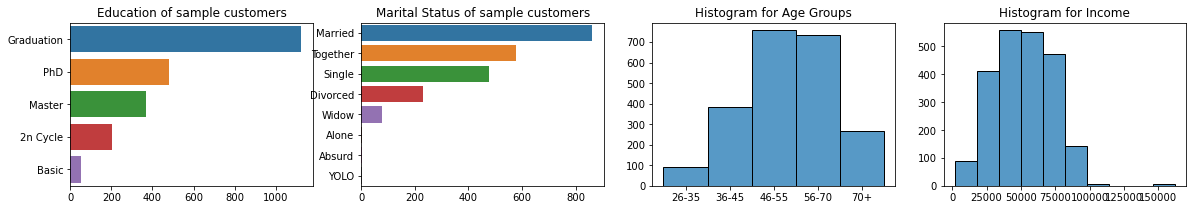

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,3))
ax = ax.flatten()
for i,col in enumerate(['Education', 'Marital_Status']):
    df_chart = df.groupby(col).size().reset_index().rename(columns={0:'nb_clients'}).sort_values(by='nb_clients',ascending=False)
    sns.barplot(data=df_chart,y=col,x='nb_clients',ax=ax[i])

sns.histplot(df.AgeGroup, ax=ax[2])

sns.histplot(df.Income, bins=10, ax=ax[3])

ax[0].set_title('Education of sample customers')
ax[1].set_title('Marital Status of sample customers')
ax[2].set_title('Histogram for Age Groups')
ax[3].set_title('Histogram for Income')

for I in range(0,4):
    ax[I].set_ylabel('')
    ax[I].set_xlabel('')
plt.plot()



#### Spending Habits

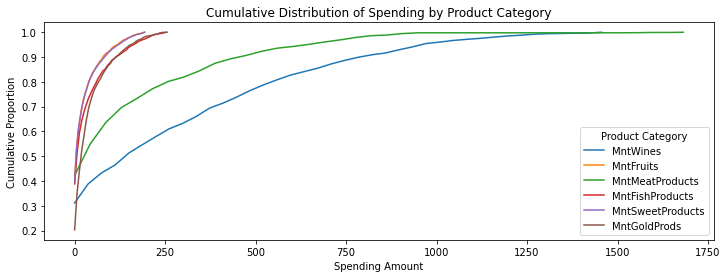

In [11]:
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a figure for the line chart
plt.figure(figsize=(12, 4))

# Plot the cumulative distribution for each spending column
for col in spend_columns:
    values, base = np.histogram(df[col], bins=40)
    cumulative = np.cumsum(values) / len(df[col])
    plt.plot(base[:-1], cumulative, label=col)

plt.title('Cumulative Distribution of Spending by Product Category')
plt.xlabel('Spending Amount')
plt.ylabel('Cumulative Proportion')
plt.legend(title='Product Category')
plt.show()

Meat and wine are categories with higher spending. we could target high spenders with exclusive promotions or loyalty programs for these products.

Fish, Sweet and Fruits have a narrower range of spending, indicating these are more affordable and commonly purchased items. We could implement 
bundle sales or discounts to encourage bulk purchasing and increase overall spending in these categories. 

A notable proportion of customers purchase gold products, even though they are premium. We could consider cross-promotions with meat and wine products to enhance perceived value.

We should notice that this sample represents middle to upper-middle-class of demographics, which should be representative of the full population in order to apply this segmentation to the whole population

### Segmentation

#### feature selection, dummies and scaling

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'AgeGroup'],
      dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

features = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response'
        ] #'AgeGroup' instead of 'Age'


df_features = df[features]

# Convert 'Dt_Customer' to numeric (days since first customer)
df_features['Dt_Customer'] = pd.to_datetime(df_features['Dt_Customer'])
df_features['CustomerSinceDays'] = (pd.to_datetime('2024-01-01') - df_features['Dt_Customer']).dt.days
df_features = df_features.drop(columns=['Dt_Customer'])

# One-Hot Encode categorical features
categorical_features = ['Education', 'Marital_Status'] #'AgeGroup'
df_features = pd.get_dummies(df_features, columns=categorical_features, drop_first=True)

df_features_scaled = df_features.copy()

# Select numeric features for scaling
numeric_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                    'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'CustomerSinceDays','Age',
                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5'#,'Response'
                   ] #added 'Age'

# Standardize the numeric features
scaler = StandardScaler()
df_features_scaled[numeric_features] = scaler.fit_transform(df_features[numeric_features])

# Verify the transformed DataFrame
display(df_features_scaled.head())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,CustomerSinceDays,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.289184,-0.825420,-0.931083,0.305952,0.981478,1.552208,1.677726,2.458621,1.500888,0.869257,0.346722,1.502852,2.507658,-0.556452,0.691092,-0.095087,1.017776,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,1,1.528781,0,1,0,0,0,0,0,1,0,0,0
1,-0.263457,1.031775,0.908012,-0.385507,-0.872296,-0.637123,-0.714342,-0.651209,-0.635909,-0.737000,-0.170926,-1.159947,-0.570298,-1.172829,-0.135109,-0.095087,1.274308,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-1.192003,0,1,0,0,0,0,0,1,0,0,0
2,0.920593,-0.825420,-0.931083,-0.800382,0.360583,0.570784,-0.178341,1.342741,-0.144691,-0.031814,-0.688573,1.502852,-0.228303,1.292681,-0.548210,-0.095087,0.333691,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-0.207574,0,1,0,0,0,0,0,0,1,0,0
3,-1.186462,1.031775,-0.931083,-0.800382,-0.872296,-0.561629,-0.652325,-0.504864,-0.586787,-0.756588,-0.170926,-0.779547,-0.912294,-0.556452,0.277991,-0.095087,-1.291012,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-1.063384,0,1,0,0,0,0,0,0,1,0,0
4,0.296447,1.031775,-0.931083,1.550578,-0.391028,0.419796,-0.218209,0.153688,0.002674,-0.560703,1.382016,0.361653,0.113692,0.059926,-0.135109,-0.095087,-1.034480,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-0.954553,0,0,0,1,0,0,1,0,0,0,0


#### Optimal number of clusters

In [14]:
campaign_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']
remove_campaign_features = [x for x in df_features.columns if x not in campaign_features]

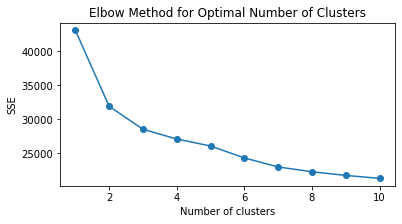

In [15]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features_scaled[remove_campaign_features])
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 3))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


#### Kmeans model fitting

In [16]:
# We observed that after the fourth clustering, the SSE improvement is low, so we will use k=4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_features_scaled['cluster'] = kmeans.fit_predict(df_features_scaled[remove_campaign_features])

# Display the first few rows with cluster assignments
display(df_features_scaled.head())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,CustomerSinceDays,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster
0,0.289184,-0.825420,-0.931083,0.305952,0.981478,1.552208,1.677726,2.458621,1.500888,0.869257,0.346722,1.502852,2.507658,-0.556452,0.691092,-0.095087,1.017776,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,1,1.528781,0,1,0,0,0,0,0,1,0,0,0,1
1,-0.263457,1.031775,0.908012,-0.385507,-0.872296,-0.637123,-0.714342,-0.651209,-0.635909,-0.737000,-0.170926,-1.159947,-0.570298,-1.172829,-0.135109,-0.095087,1.274308,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-1.192003,0,1,0,0,0,0,0,1,0,0,0,3
2,0.920593,-0.825420,-0.931083,-0.800382,0.360583,0.570784,-0.178341,1.342741,-0.144691,-0.031814,-0.688573,1.502852,-0.228303,1.292681,-0.548210,-0.095087,0.333691,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-0.207574,0,1,0,0,0,0,0,0,1,0,0,1
3,-1.186462,1.031775,-0.931083,-0.800382,-0.872296,-0.561629,-0.652325,-0.504864,-0.586787,-0.756588,-0.170926,-0.779547,-0.912294,-0.556452,0.277991,-0.095087,-1.291012,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-1.063384,0,1,0,0,0,0,0,0,1,0,0,0
4,0.296447,1.031775,-0.931083,1.550578,-0.391028,0.419796,-0.218209,0.153688,0.002674,-0.560703,1.382016,0.361653,0.113692,0.059926,-0.135109,-0.095087,-1.034480,-0.262613,-0.116722,-0.280681,-0.284379,-0.279751,0,-0.954553,0,0,0,1,0,0,1,0,0,0,0,0


#### Analysis of generated clusters

In [17]:
# Add the Cluster column to the original DataFrame
df_features['cluster'] = df_features_scaled['cluster']

cluster_means = df_features.groupby('cluster').mean()
print("Mean values for each cluster (mean of original values):")
display(cluster_means)

cluster_means_2 = df_features_scaled.groupby('cluster').mean()
print("Mean values for each cluster (mean of scaled values):")
display(cluster_means_2)

Mean values for each cluster (mean of original values):


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,CustomerSinceDays,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,29374.708995,0.843034,0.007055,48.650794,32.437390,6.331570,26.375661,9.530864,6.414462,17.372134,1.880071,2.236332,0.507937,3.111111,6.970018,0.012346,45.878307,0.001764,0.000000,0.088183,0.003527,0.000000,0.119929,3815.569665,0.081129,0.506173,0.148148,0.139330,0.001764,0.081129,0.403880,0.266314,0.238095,0.008818,0.000000
1,75564.329897,0.041237,0.164948,49.520619,586.984536,69.630584,455.664948,100.024055,70.776632,76.087629,1.307560,5.113402,5.981100,8.450172,2.783505,0.006873,55.522337,0.201031,0.027491,0.082474,0.113402,0.243986,0.273196,3825.378007,0.001718,0.560137,0.142612,0.199313,0.000000,0.094502,0.357388,0.243986,0.257732,0.042955,0.000000
2,58890.511029,0.205882,0.917279,48.134191,517.806985,22.709559,145.939338,31.729779,23.658088,64.931985,3.795956,6.536765,3.275735,7.966912,5.860294,0.007353,59.091912,0.042279,0.022059,0.069853,0.154412,0.036765,0.143382,3896.913603,0.001838,0.476103,0.180147,0.288603,0.001838,0.123162,0.413603,0.161765,0.248162,0.047794,0.003676
3,43263.124304,0.701299,0.985158,50.302412,70.903525,4.217069,25.567718,5.641929,4.307978,14.680891,2.428571,2.296846,0.747681,3.602968,5.807050,0.009276,60.306122,0.005566,0.003711,0.050093,0.027829,0.000000,0.053803,3770.050093,0.011132,0.467532,0.194805,0.243043,0.001855,0.116883,0.372913,0.176252,0.293135,0.038961,0.000000


Mean values for each cluster (mean of scaled values):


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,CustomerSinceDays,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.058600,0.740258,-0.918109,-0.017278,-0.808610,-0.502956,-0.624083,-0.513446,-0.502925,-0.514237,-0.233007,-0.689647,-0.738582,-0.830397,0.678706,0.035922,-0.788354,-0.255434,-0.116722,0.058246,-0.270973,-0.279751,0.119929,-0.056349,0.081129,0.506173,0.148148,0.139330,0.001764,0.081129,0.403880,0.266314,0.238095,0.008818,0.000000
1,1.105744,-0.748835,-0.627727,0.012795,0.838834,1.089947,1.277564,1.141957,1.077867,0.635912,-0.529365,0.404791,1.133214,0.815041,-1.050744,-0.022154,0.036314,0.555683,0.122016,0.036303,0.146640,0.660658,0.273196,-0.007829,0.001718,0.560137,0.142612,0.199313,0.000000,0.094502,0.357388,0.243986,0.257732,0.042955,0.000000
2,0.324445,-0.443056,0.755881,-0.035138,0.633322,-0.090808,-0.094445,-0.107358,-0.079406,0.417389,0.758746,0.946238,0.207992,0.666106,0.220279,-0.017060,0.341550,-0.090515,0.074839,-0.012206,0.302510,-0.138047,0.143382,0.346049,0.001838,0.476103,0.180147,0.288603,0.001838,0.123162,0.413603,0.161765,0.248162,0.047794,0.003676
3,-0.407820,0.477029,0.880715,0.039824,-0.694335,-0.556167,-0.627662,-0.584586,-0.554662,-0.566954,0.050923,-0.666627,-0.656590,-0.678813,0.198284,0.003352,0.445378,-0.239957,-0.084499,-0.088153,-0.178606,-0.279751,0.053803,-0.281529,0.011132,0.467532,0.194805,0.243043,0.001855,0.116883,0.372913,0.176252,0.293135,0.038961,0.000000


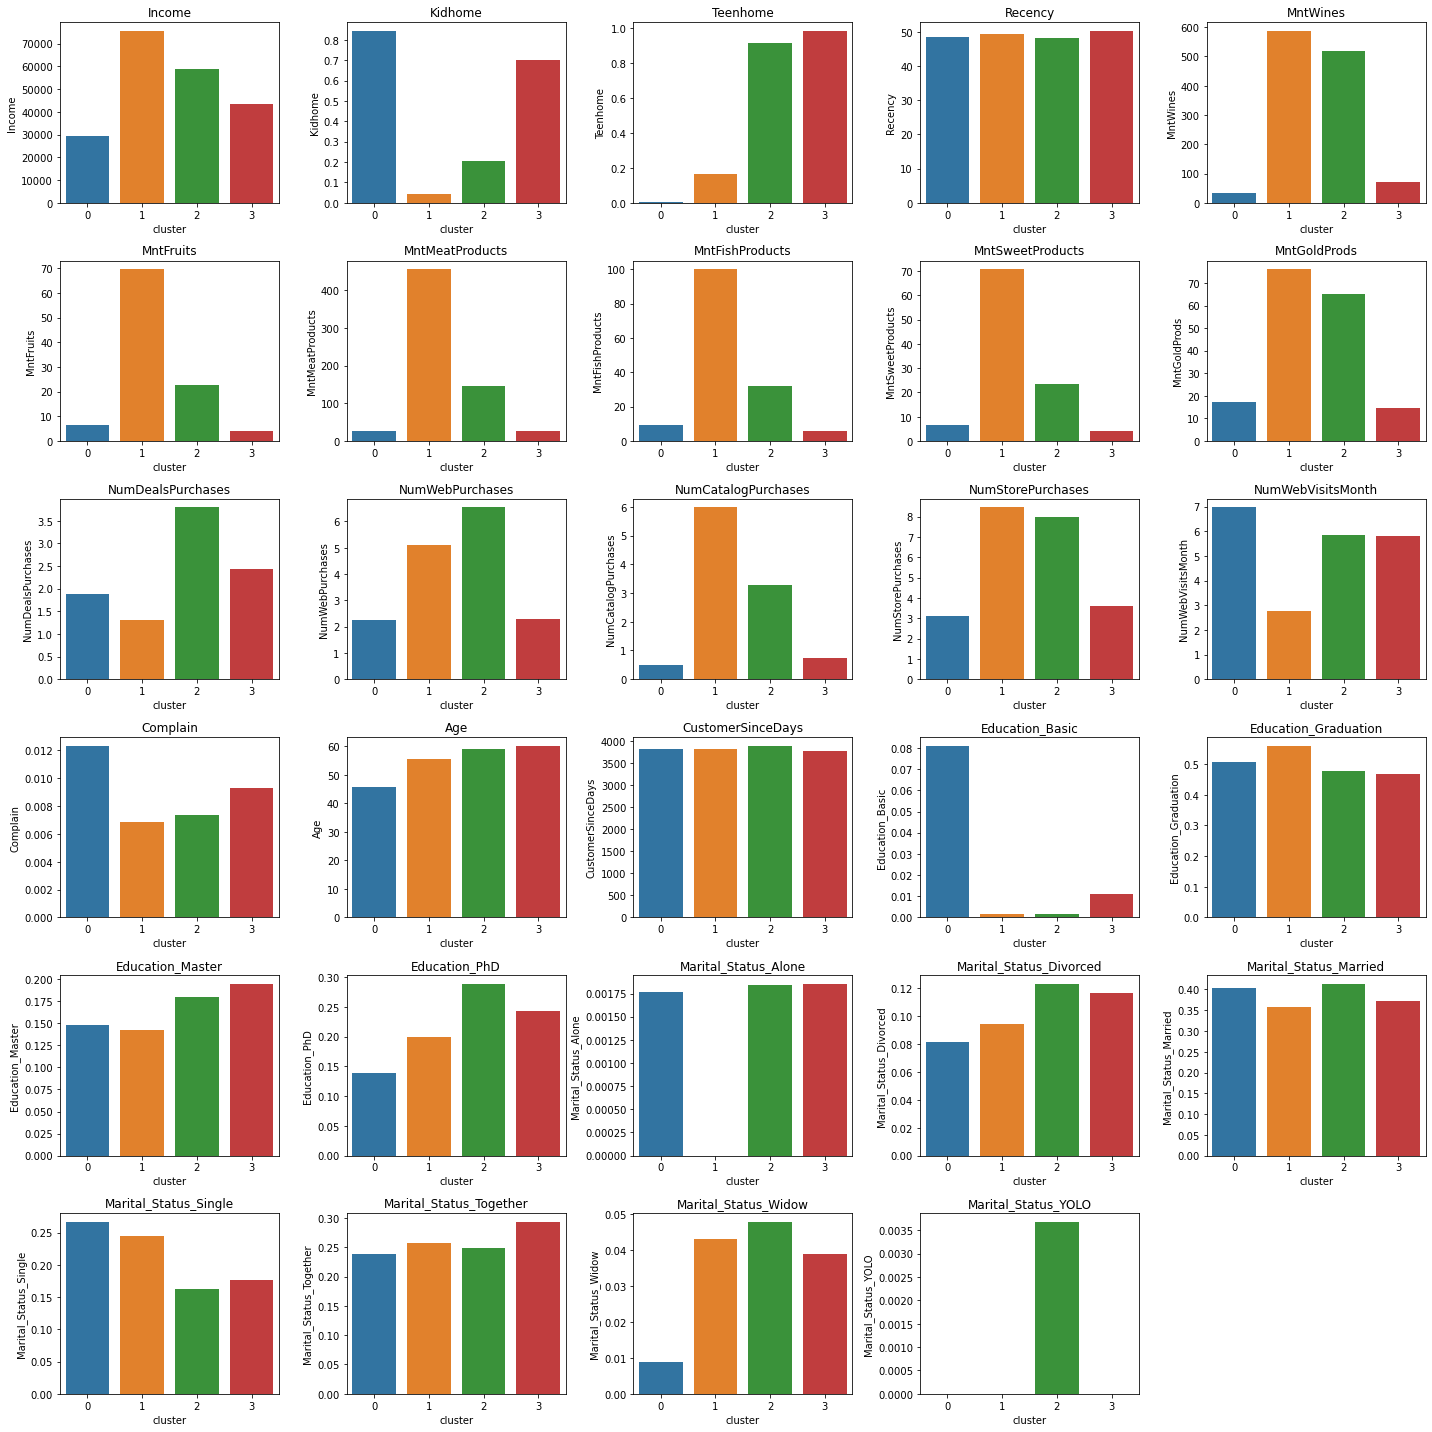

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cluster_means' is your DataFrame with cluster means
# Reset the index to ensure proper handling of the cluster column


fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(cluster_means[remove_campaign_features].columns):
    df_chart = cluster_means.reset_index()[['cluster', col]].groupby('cluster')[col].mean().reset_index()
    sns.barplot(data=df_chart, y=col, x='cluster', ax=ax[i])
    ax[i].set_title(col)

# Turn off the remaining empty subplots
for j in range(i+1, len(ax)):
    ax[j].axis('off')
    
plt.tight_layout()
plt.show()

#### Segment labeling:

Cluster 0: "Low-Income Families with Small Children"
Characteristics: Low income, basic education, high number of small children, low spending across categories, higher web visits.

Cluster 1: "High-Income, High Spenders"
Characteristics: High income, low number of children, indifferent to deals, high spending accross all categories inclusive gold products, low web visits.

Cluster 2: "Moderate-Income, Older Adults, Balanced Spending"
Characteristics: Above average income, more teens at home, higher spending on wines, moderate spending on other categories, high web and deal purchases.

Cluster 3: "Middle-Income Families with Teens, Low Spenders"
Characteristics: Below average income, more children (small and teens), low spending across categories, higher web visits, deal chasers.

### Predictive model

In [19]:
df_features_scaled.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'CustomerSinceDays',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'cluster'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix

In [21]:
df_features_scaled['Response'] = df['Response'].astype(int)

# Features and target variable
X = df_features_scaled.drop(columns=['Response'])
y = df_features_scaled['Response']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
cl_report = (classification_report(y_test, y_pred,output_dict = True))
type(cl_report)
cl_report_df = pd.DataFrame(cl_report).transpose()
display(cl_report_df)
cm = confusion_matrix(y_test,y_pred)

print(f'precision_score - TP/(TP+FP): {cm[1,1]}/({cm[1,1]}+{cm[0,1]}) = {precision_score(y_test, y_pred):.4}')
print(f'accuracy_score - (TP+TN)/(TP+TN+FP+FN): ({cm[1,1]} + {cm[0,0]}) / ({cm[1,1]} + {cm[0,0]} + {cm[0,1]} + {cm[1,0]}) = {accuracy_score(y_test,y_pred):.4}')
print(f'recall_score - TP/(TP+FN): {cm[1,1]} /({cm[1,1]} + {cm[1,0]}) = {recall_score(y_test,y_pred):.4}')
print(f'F1 Score: - 2TP/(2TP+FP+FN): 2*{cm[1,1]}/(2*{cm[1,1]}+{cm[0,1]}+{cm[1,0]}) {f1_score(y_test,y_pred):.4}')

# Create a dataframe with proper labels
cmdf = pd.DataFrame(cm, index=['Actual: 0', 'Actual: 1'], columns=['Predicted: 0', 'Predicted: 1'])

display(cmdf)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
print("Cross-validated precision scores:", cv_scores)
print("Average precision score:", cv_scores.mean())


,precision,recall,f1-score,support
0,0.892944,0.963255,0.926768,381.000000
1,0.611111,0.333333,0.431373,66.000000
accuracy,0.870246,0.870246,0.870246,0.870246
macro avg,0.752028,0.648294,0.679070,447.000000
weighted avg,0.851331,0.870246,0.853622,447.000000


precision_score - TP/(TP+FP): 22/(22+14) = 0.6111
accuracy_score - (TP+TN)/(TP+TN+FP+FN): (22 + 367) / (22 + 367 + 14 + 44) = 0.8702
recall_score - TP/(TP+FN): 22 /(22 + 44) = 0.3333
F1 Score: - 2TP/(2TP+FP+FN): 2*22/(2*22+14+44) 0.4314


,Predicted: 0,Predicted: 1
Actual: 0,367,14
Actual: 1,44,22


Cross-validated precision scores: [0.67741935 0.8        0.58823529 0.72       0.83333333]
Average precision score: 0.7237975964579382


#### Conclusion

Model is ready to be applied, and based on cross validation numbers (min 0.58, max 0.83, avg 0.72) , it will outperform having no model (0.15 as from the problem statement) well enough to be profitable. We just need to apply the prediction in the full customer database

It's recommendable to further refinement of the model by mixing other predictors so we would increase the F1-Score (0.43), but it is well capable of identified true converters (high precision)

### Analysis of demographic characteristic of those who converted on sixth (pilot) campaign

In [22]:
df_features_2 = pd.get_dummies(df_features, columns=['cluster'], drop_first=False)
df_grouped = df_features_2.groupby('Response').mean()

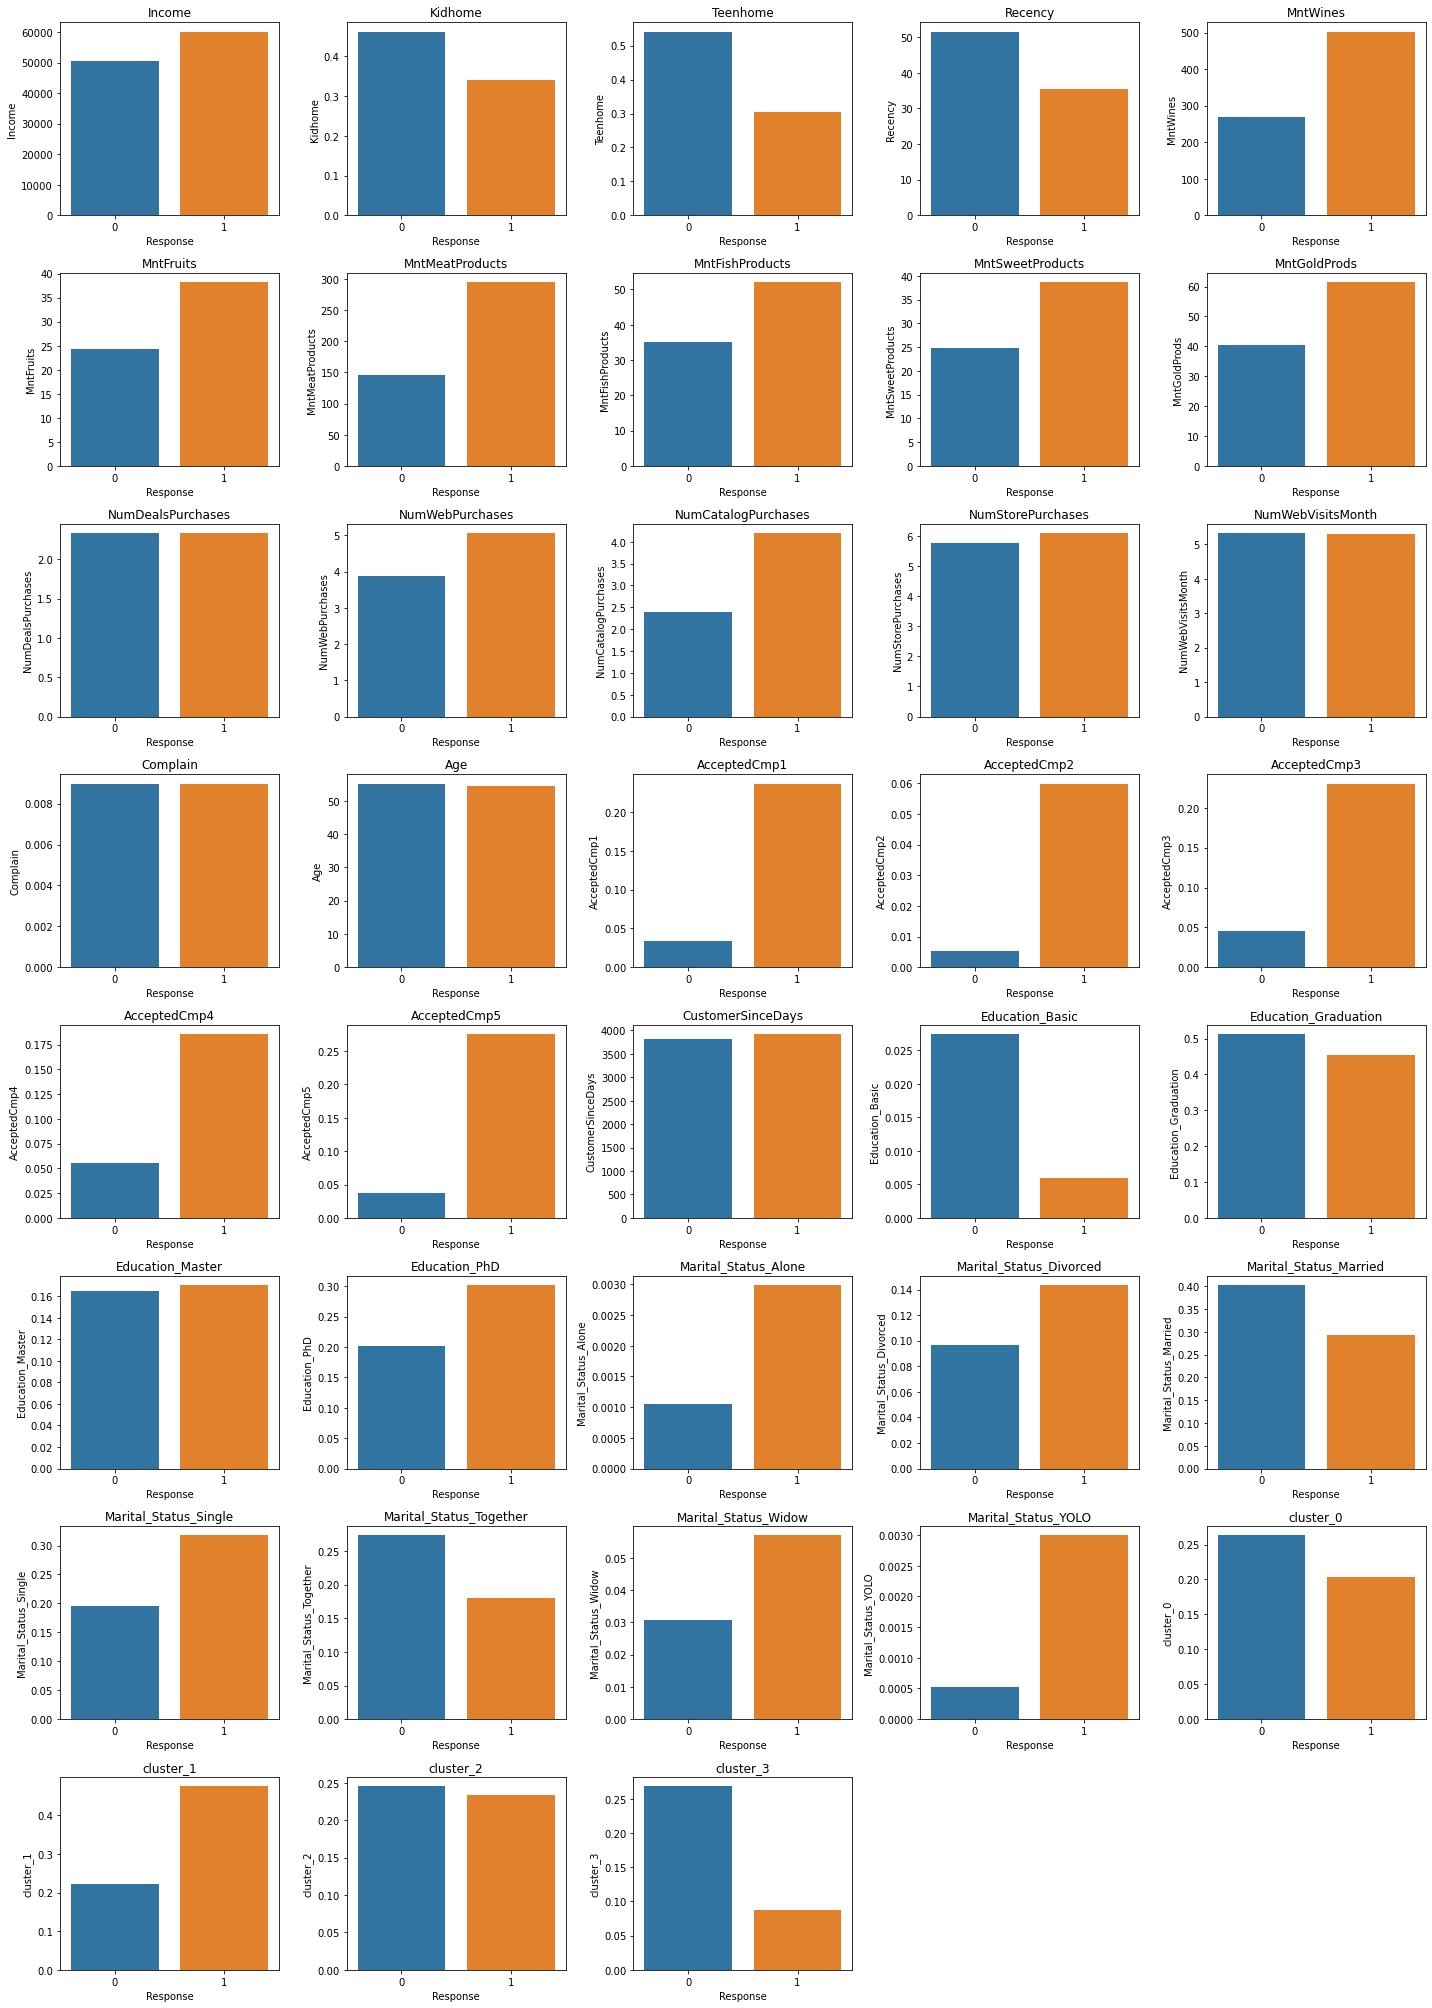

In [24]:
fig, ax = plt.subplots(nrows=8, ncols=5, figsize=(20, 28))
ax = ax.flatten()

for i, col in enumerate(df_grouped.columns):
    df_chart = df_grouped.reset_index()[['Response', col]].groupby('Response')[col].mean().reset_index()
    sns.barplot(data=df_chart, y=col, x='Response', ax=ax[i])
    ax[i].set_title(col)

# Turn off the remaining empty subplots
for j in range(i+1, len(ax)):
    ax[j].axis('off')
    
plt.tight_layout()
plt.show()


Demographic characteristics of customers that converted on pilot campaign
-----

Most are single (single, divorced or widowed) clients, of higher (non basic) education.  less kids, that are used to spending more and accepted any from the campaigns from 1-5, 

Users are more inclined to convert when they pertain to cluster 1 =  "High-Income, High Spenders" 
Characteristics of cluster 1: High income, low number of children, indifferent to deals, high spending accross all categories inclusive gold products, low web visits.

Users are less inclined to convert when they pertain to cluster 3 = "Middle-Income Families with Teens, Low Spenders" 
Characteristics of cluster 3: Below average income, more children (small and teens), low spending across categories, higher web visits, deal chasers.

Characteristics of Users Who Convert
-------
Demographic and Behavioral Characteristics:

Marital Status: Most converters are single, divorced, or widowed.
Education: Higher education levels (Graduation, Master's, PhD).
Children: Fewer children, whether kids or teens.
Spending Behavior: Higher spending across various product categories, including gold products.
Campaign Response History: More likely to have accepted offers in previous campaigns (Campaigns 1-5).

Cluster Analysis:
-------
*Focus on High-Converting Segments*: The company should focus marketing efforts on users who fall into Cluster 1, as they are more likely to convert. This includes emphasizing the high-quality and premium aspects of the products to attract high spenders. Also, Catalog and Web seem to be the preferred channels for the campaign approach, compared to store

*Avoiding Low-Converting Segments*:
Users in Cluster 3 are less likely to convert, so it might be more efficient to allocate fewer resources towards them or to use different strategies such as highlighting deals or discounts which they are more inclined to respond to.